<a href="https://colab.research.google.com/github/pratyush-3000/me/blob/master/Pratyush_Lahane_Final_Project_Credit_Card_Fraud_Detection_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

print("Path to dataset files:", path)

100%|██████████| 143M/143M [00:02<00:00, 50.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [ ]:
# Import necessary libraries
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Download the dataset
print("Downloading dataset...")
dataset_dir = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

# Locate the CSV file in the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_dir, filename)
        break

# Load the dataset
df = pd.read_csv(csv_file_path)

# Display basic dataset info
print("Dataset loaded successfully.")
print(df.info())
print(df.head())


Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-

Class
0    284315
1    284315
Name: count, dtype: int64
Class Distribution (Counts):
Class
0    284315
1    284315
Name: count, dtype: int64

Class Distribution (Percentages):
Class
0    50.0
1    50.0
Name: count, dtype: float64


<ipython-input-6-e0ec77da5306>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


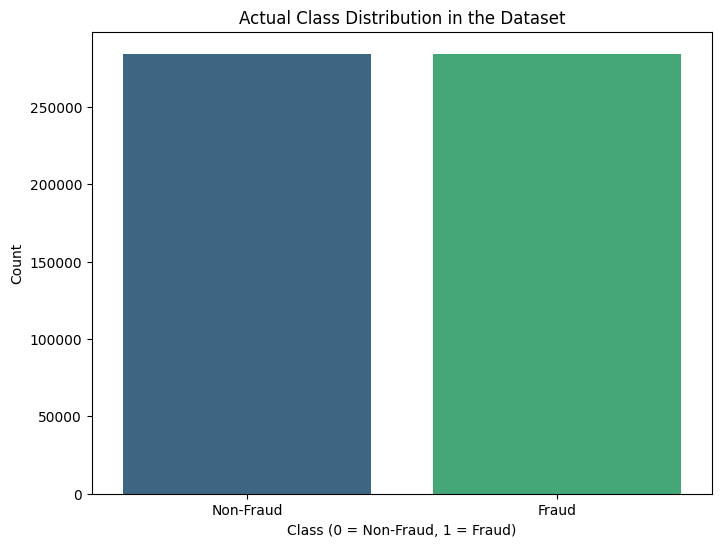

In [ ]:

print(df['Class'].value_counts())

class_distribution = df['Class'].value_counts()
class_distribution_percentage = (class_distribution / len(df)) * 100

# Print the actual class distribution
print("Class Distribution (Counts):")
print(class_distribution)
print("\nClass Distribution (Percentages):")
print(class_distribution_percentage)

# Create a bar chart for the true class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Actual Class Distribution in the Dataset")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.show()

In [ ]:
# Drop unnecessary columns if they exist
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)
else:
    print("'id' column not found. Skipping drop operation.")

# Sample the data (10% for quicker model training)
df_sampled = df.sample(frac=0.1, random_state=42)

# Split features and target
X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define models to train
models = {
    "SGDClassifier": SGDClassifier(random_state=42),
    "SVM (Linear)": SVC(kernel="linear", random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Initialize results list
results = []

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)

    # Predict on train and test data
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate metrics
    precision_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Confusion matrix
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    # Store results
    results.append({
        "Model": model_name,
        "Precision (Train)": precision_train,
        "Recall (Train)": recall_train,
        "F1 Score (Train)": f1_train,
        "Precision (Test)": precision_test,
        "Recall (Test)": recall_test,
        "F1 Score (Test)": f1_test
    })

    # Print model-specific results
    print(f"\n{model_name} Evaluation:")
    print("Confusion Matrix (Test):\n", conf_matrix_test)
    print(f"Precision (Test): {precision_test:.4f}")
    print(f"Recall (Test): {recall_test:.4f}")
    print(f"F1 Score (Test): {f1_test:.4f}")


Training SGDClassifier...

SGDClassifier Evaluation:
Confusion Matrix (Test):
 [[8323  227]
 [ 352 8157]]
Precision (Test): 0.9729
Recall (Test): 0.9586
F1 Score (Test): 0.9657
Training SVM (Linear)...

SVM (Linear) Evaluation:
Confusion Matrix (Test):
 [[8409  141]
 [ 430 8079]]
Precision (Test): 0.9828
Recall (Test): 0.9495
F1 Score (Test): 0.9659
Training SVM (RBF)...

SVM (RBF) Evaluation:
Confusion Matrix (Test):
 [[8485   65]
 [ 143 8366]]
Precision (Test): 0.9923
Recall (Test): 0.9832
F1 Score (Test): 0.9877
Training Decision Tree...

Decision Tree Evaluation:
Confusion Matrix (Test):
 [[8425  125]
 [  95 8414]]
Precision (Test): 0.9854
Recall (Test): 0.9888
F1 Score (Test): 0.9871
Training Random Forest...

Random Forest Evaluation:
Confusion Matrix (Test):
 [[8542    8]
 [  32 8477]]
Precision (Test): 0.9991
Recall (Test): 0.9962
F1 Score (Test): 0.9976


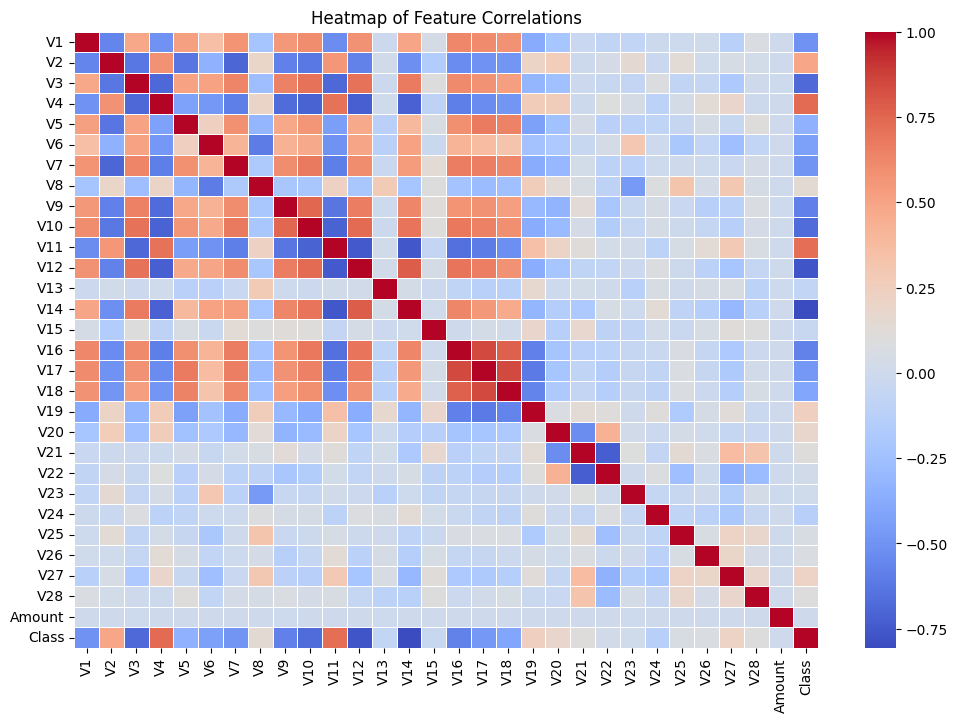

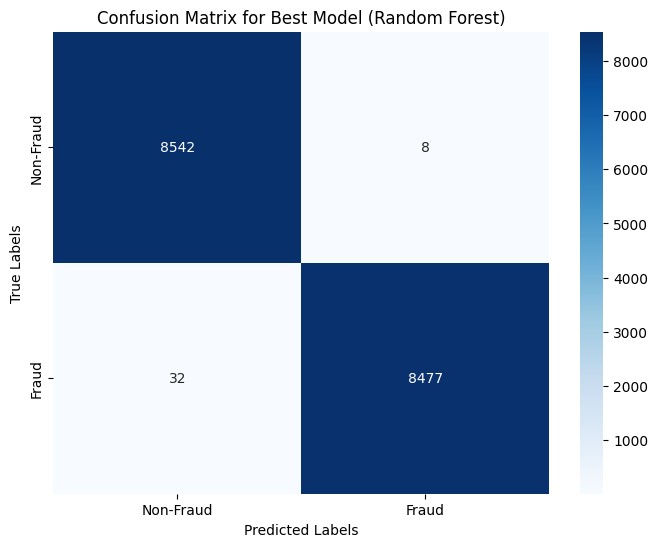

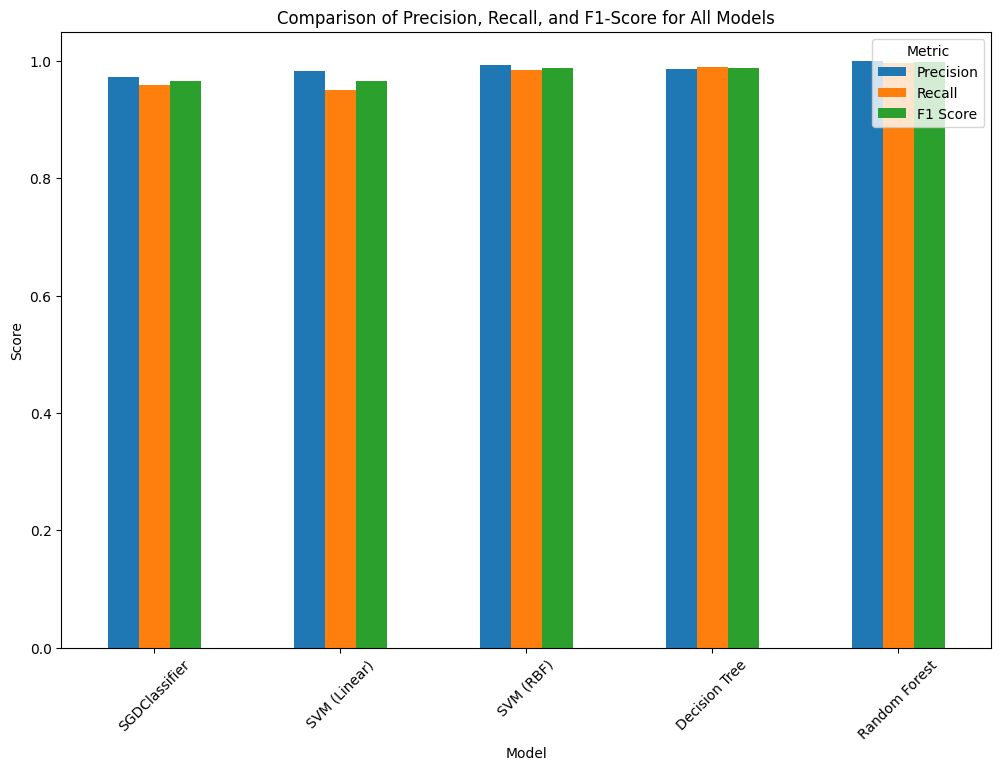

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Generate a heatmap to show correlations among features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

# Use the best model (Random Forest) to generate predictions and confusion matrix
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predictions on the test dataset
y_pred_test = best_model.predict(X_test_scaled)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix for Best Model (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate bar chart for precision, recall, and F1-score for all models
metrics = {"Model": [], "Precision": [], "Recall": [], "F1 Score": []}

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

# Create a DataFrame for visualization
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index("Model", inplace=True)

# Plot the bar chart
metrics_df.plot(kind="bar", figsize=(12, 8))
plt.title("Comparison of Precision, Recall, and F1-Score for All Models")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()
